In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import glob
from tqdm import tqdm
from scipy.stats import zscore
from meteostat import Point, Hourly

In [2]:
# dir_items = os.listdir("./")
os.makedirs("compressed_data", exist_ok=True)
# req_folders = ["data_4", "data_5"]
# folders = [item for item in dir_items if os.path.isdir(os.path.join("./final_csv_files", item))]  #  and item in req_folders
folders = ["data_8", "data_9"]
for idx, folder in enumerate(folders):
    dataframes = []
    all_files = [f for f in os.listdir(f"final_csv_files/{folder}") if f.endswith('.csv')]
    for file in tqdm(all_files):
        df = pd.read_csv(f"final_csv_files/{folder}/"+file)
        filename = os.path.basename(file)
        timestamp = int(filename.split('-')[1].split('.')[0])
        local_dt = datetime.fromtimestamp(timestamp)

        df['frequency'] = df['frequency'].round(0).astype(int)
        df = df.groupby('frequency', as_index=False)['power'].mean()
        date = local_dt.strftime('%x %X')
        df["Date"] = date 
        dataframes.append(df)
    
    df = pd.concat(dataframes)
    df = df.sort_values(by="Date")
    df.to_csv(f"./compressed_data/compressed_{folder}.csv", index=False)

  0%|          | 0/3417 [00:00<?, ?it/s]

100%|██████████| 4466/4466 [03:21<00:00, 22.19it/s]


In [72]:
idx_loc = {0: "Madsen", 1: "EBC", 2: "Sagepoint", 3: "Moran", 4: "Bookstore", 5: "WEB", 6: "Garage", 7: "Guesthouse"}

## Power v/s Frequency

238


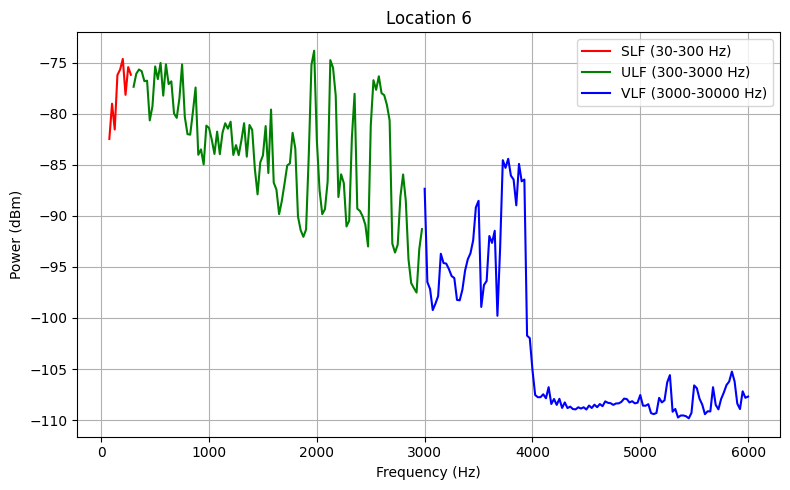

238


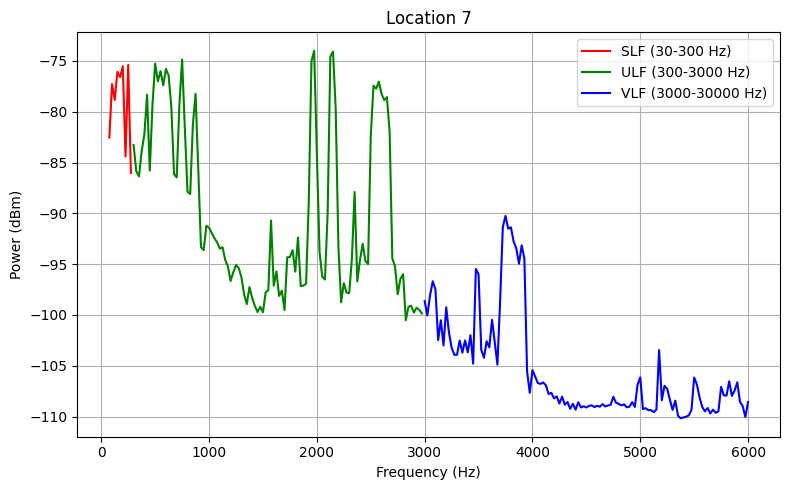

238


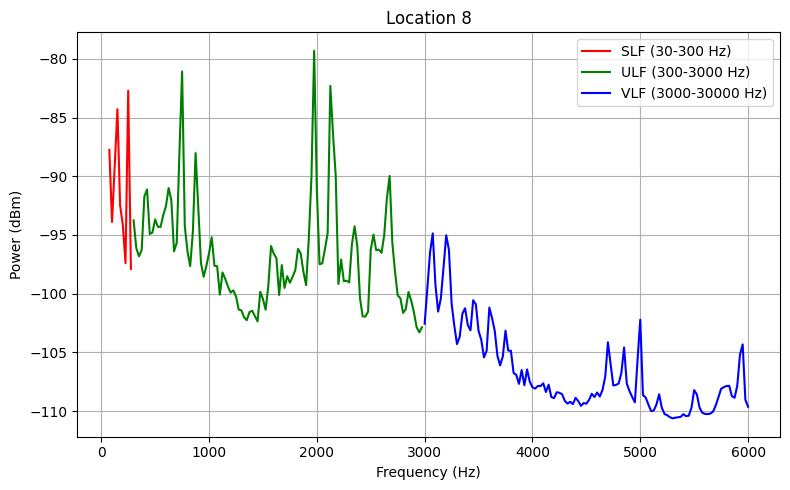

238


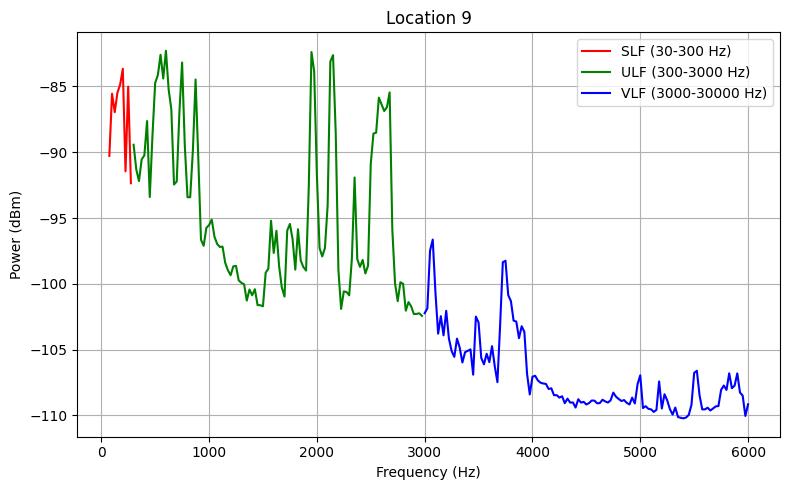

In [9]:
# files = ["final_csv_files/data_0/nuc1_rf0-1701575348.csv", "final_csv_files/data_1/nuc2_rf0-1701038559.csv", "final_csv_files/data_2/nuc2_rf0-1701121861.csv", "final_csv_files/data_3/nuc2_rf0-1701041938.csv", "final_csv_files/data_4/nuc2_rf0-1701038696.csv", "final_csv_files/data_5/nuc2_rf0-1701038773.csv"]

for idx, file in enumerate(os.listdir('./compressed_data/')[-4:], start=6):
    df = pd.read_csv('./compressed_data/'+file)
    df = df[["frequency", "power"]]
    # df['frequency'] = df['frequency'].round(0).astype(int)
    df['frequency'] = (df['frequency'] / 25).round(0) * 25
    df['frequency'] = df['frequency'].astype(int)
    df = df.groupby('frequency', as_index=False)['power'].mean()
    print(len(df))
    mask_slf = (df["frequency"] >= 30) & (df["frequency"] < 300)
    mask_ulf = (df["frequency"] >= 300) & (df["frequency"] < 3000)
    mask_vlf = (df["frequency"] >= 3000) & (df["frequency"] <= 30000)
    
    plt.figure(figsize=(8, 5))
    plt.plot(df[mask_slf]["frequency"], df[mask_slf]["power"], linestyle='-', color='red', label='SLF (30-300 Hz)')
    plt.plot(df[mask_ulf]["frequency"], df[mask_ulf]["power"], linestyle='-', color='green', label='ULF (300-3000 Hz)')
    plt.plot(df[mask_vlf]["frequency"], df[mask_vlf]["power"], linestyle='-', color='blue', label='VLF (3000-30000 Hz)')

    plt.title(f'Location {idx}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power (dBm)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

100%|██████████| 20/20 [00:01<00:00, 17.46it/s]


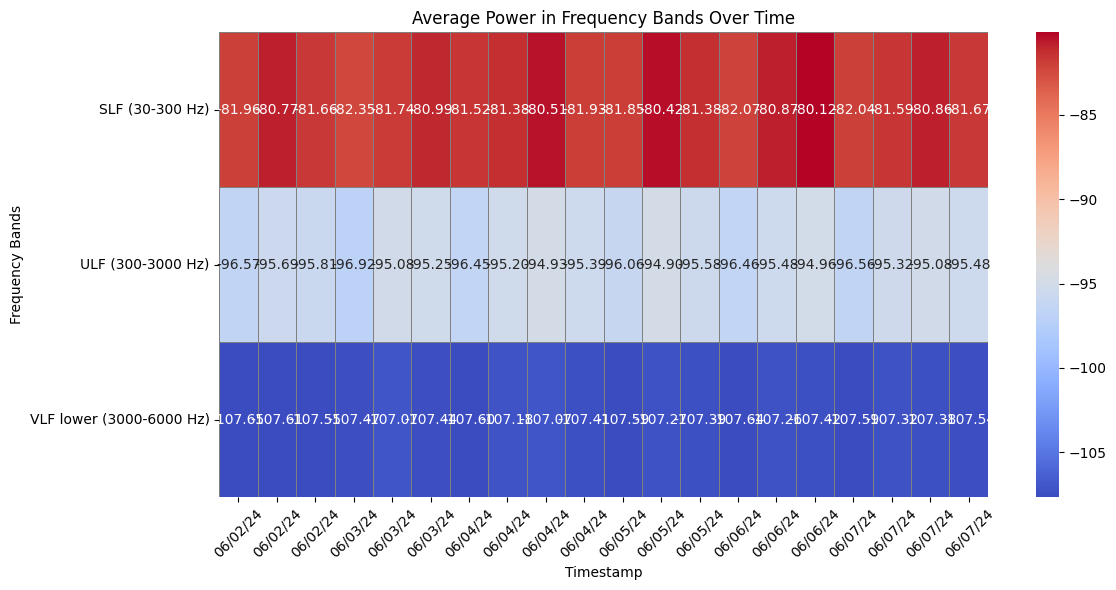

In [42]:
heatmap_data = pd.DataFrame()

bands = {
    # 'Power Line (50-70 Hz)': (50, 70),
    'SLF (30-300 Hz)': (30, 300),
    'ULF (300-3000 Hz)': (300, 3000),
    'VLF lower (3000-6000 Hz)': (3000, 6000)
}

for file in tqdm(sorted(os.listdir("final_csv_files/data_0"))[500:520]):
    if file.endswith(".csv"):
        timestamp = int(file.split('-')[1].split('.')[0])
        local_dt = datetime.fromtimestamp(timestamp)
        timestamp_dt = local_dt.strftime('%x')
        df = pd.read_csv(os.path.join("final_csv_files/data_0", file), header=0, names=['frequency', 'power', 'center_freq'])
        if df['frequency'].isnull().all():
            continue
        avg_power_per_band = {}
        for band, (low_freq, high_freq) in bands.items():
            band_df = df[(df['frequency'] >= low_freq) & (df['frequency'] <= high_freq)]
            avg_power = band_df['power'].mean()
            avg_power_per_band[band] = avg_power
        
        avg_power_per_band['timestamp'] = timestamp_dt
        heatmap_data = pd.concat([heatmap_data, pd.DataFrame([avg_power_per_band])], ignore_index=True)

# Pivot table for heatmap
heatmap_pivot = heatmap_data.set_index('timestamp').T

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_pivot, 
    annot=True, fmt=".2f", cmap='coolwarm',
    linewidths=0.5, linecolor='gray'
)
plt.title('Average Power in Frequency Bands Over Time')
plt.ylabel('Frequency Bands')
plt.xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Power v/s Week/Month/Quarter

In [2]:
df = pd.read_csv("freq_2412.csv")

In [58]:
df.columns

Index(['frequency', 'power', 'Date', 'temp', 'rhum', 'prcp', 'pres'], dtype='object')

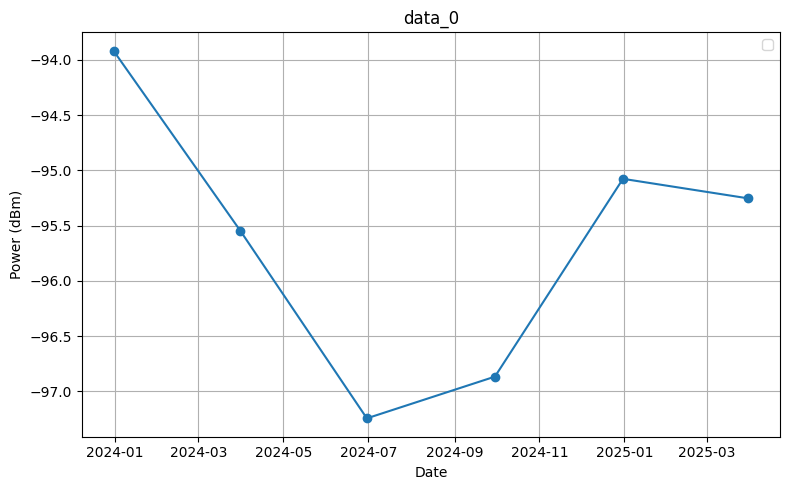

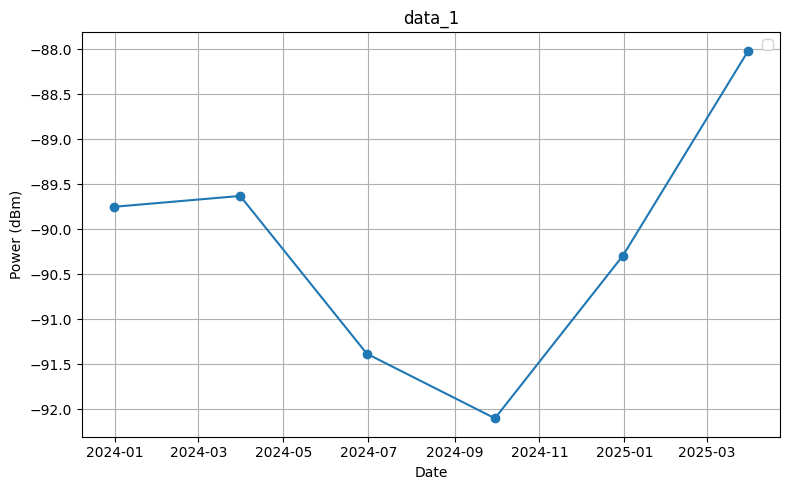

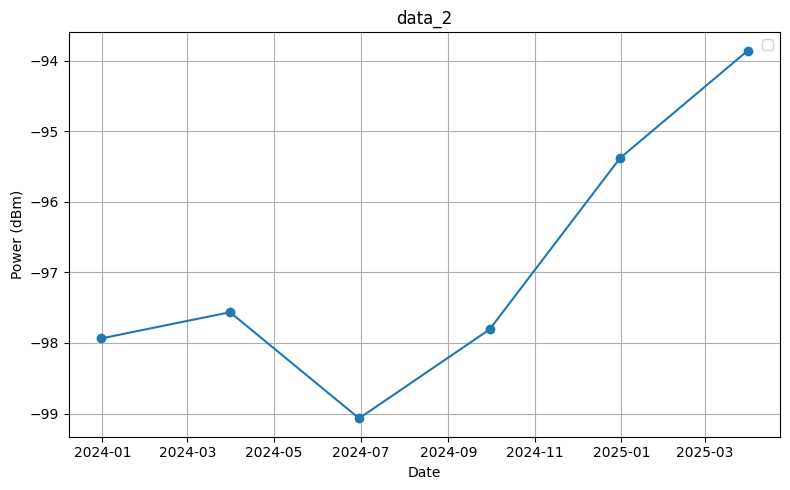

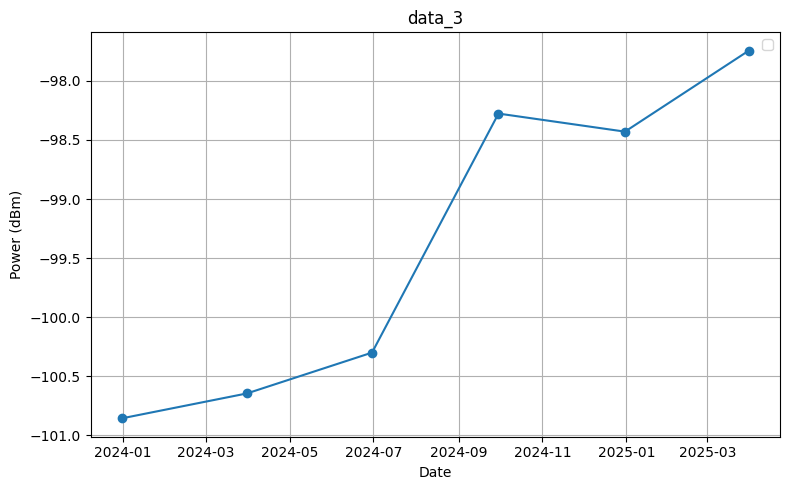

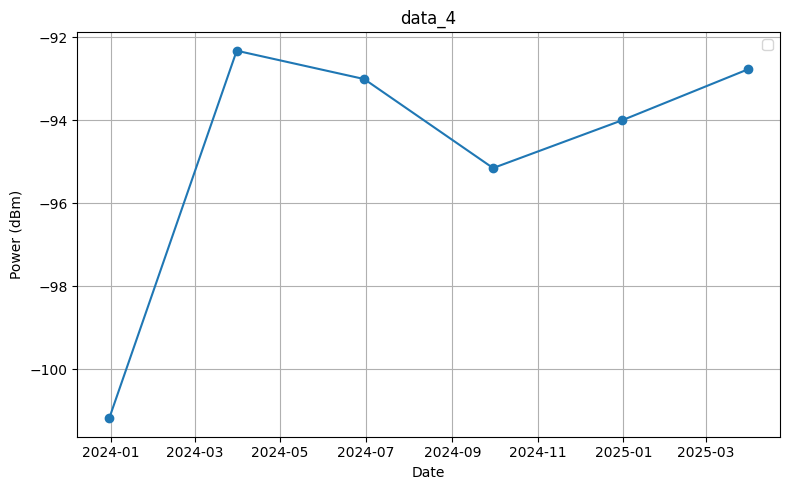

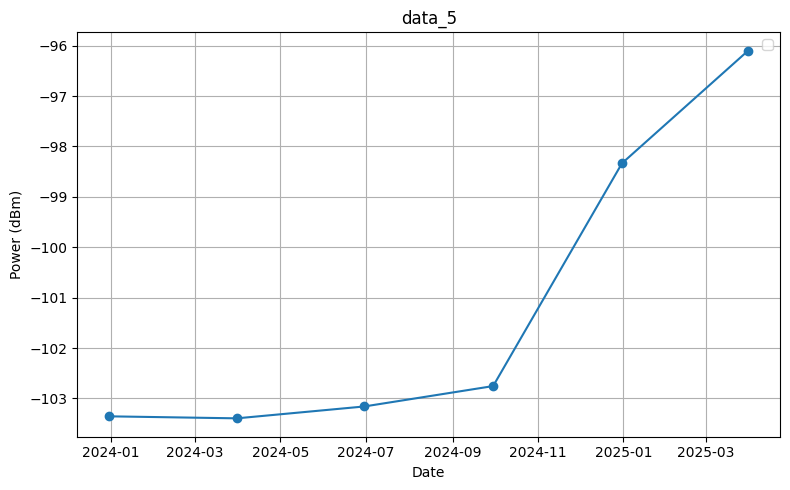

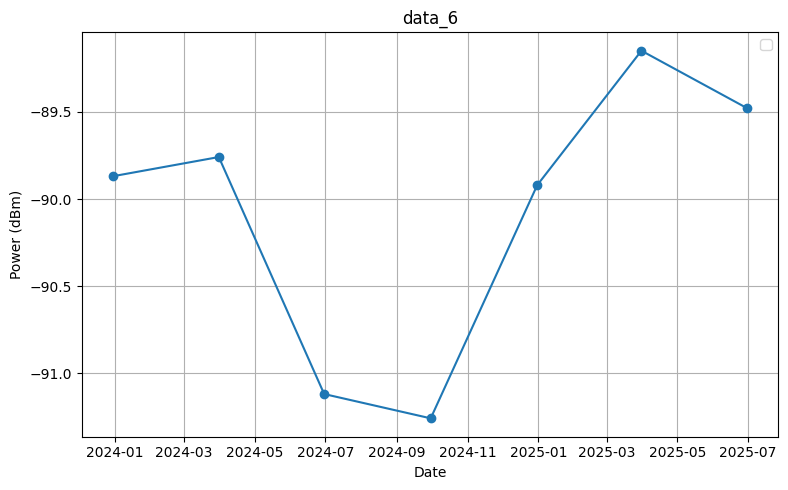

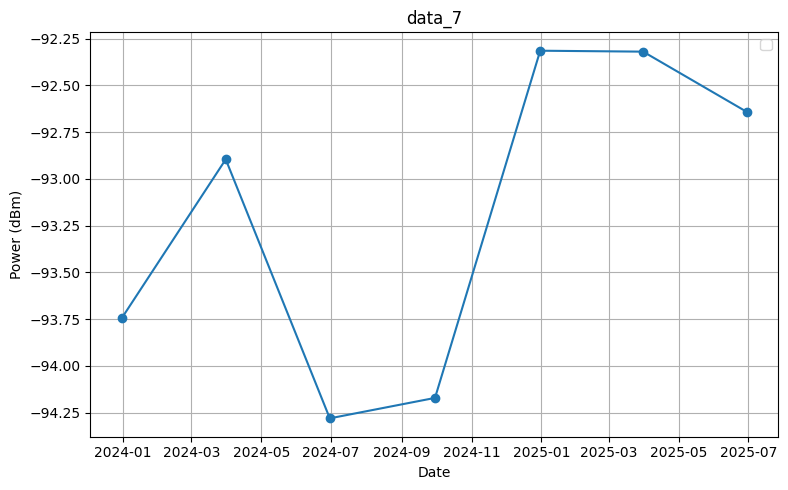

In [4]:
# csv_files = glob.glob("compressed_data/*.csv")
# dataframes = []
# for file in ["freq_2412.csv", "freq_2437.csv", "freq_2462.csv", "freq_2484.csv"]:  # ["freq_2412.csv", "freq_2437.csv", "freq_2462.csv", "freq_2484.csv"]
#     df = pd.read_csv(file)
#     dataframes.append(df)
# df = pd.concat(dataframes)

folders = ["data_0", "data_1", "data_2", "data_3", "data_4", "data_5", "data_6", "data_7"]
for folder in folders:
    df = pd.read_csv(f"compressed_data/compressed_{folder}.csv")
    df["Date"] = pd.to_datetime(df["Date"])

    df1 = df.sort_values(by="Date")
    df1 = df1[(df1['frequency']>=2400) & (df1['frequency']<=2500)]

    # start_date = "2024-01-01"
    # end_date = "2024-02-01"
    # filtered_df = df1[(df1["Date"] >= start_date) & (df1["Date"] <= end_date)]

    filtered_df = df1.resample("Q", on="Date").mean(numeric_only=True)

    # Create the plot
    plt.figure(figsize=(8, 5))
    # plt.plot(filtered_df["Date"], filtered_df["power"], linestyle='-', label='Power')
    plt.plot(filtered_df.index, filtered_df["power"], marker='o', linestyle='-')

    plt.xlabel('Date')
    plt.ylabel('Power (dBm)')
    plt.title(folder)
    plt.grid(True)
    plt.legend()  # The legend now shows the label 'Power'
    plt.tight_layout()
    plt.show()

## Power v/s Weather

In [7]:
# folders = ["data_7"]

# def fetch_weather(dt):
#     return weather_lookup.get(dt, {'temp': None, 'rhum': None, 'prcp': None, 'pres': None})

# for folder in tqdm(folders):
#     df = pd.read_csv(f"compressed_data/compressed_{folder}.csv")
#     df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%y %H:%M:%S")

#     location = Point(40.76564785537748, -111.84228227656358)

#     unique_datetimes = df['Date'].unique()
#     weather_lookup = {}

#     for dt in unique_datetimes:
#         date_time = datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#         dt1 = dt + pd.Timedelta(hours=1)
#         date_time1 = datetime(dt1.year, dt1.month, dt1.day, dt1.hour, dt1.minute, dt1.second)
        
#         weather = Hourly(location, date_time, date_time1).fetch()

#         if not weather.empty:
#             row = weather.iloc[0]
#             weather_lookup[dt] = {
#                 'temp': row.get('temp', None),
#                 'rhum': row.get('rhum', None),
#                 'prcp': row.get('prcp', None),
#                 'pres': row.get('pres', None)
#             }
#         else:
#             weather_lookup[dt] = {
#                 'temp': None,
#                 'rhum': None,
#                 'prcp': None,
#                 'pres': None
#             }

#     df['temp'] = df['Date'].apply(lambda dt: fetch_weather(dt)['temp'])
#     df['rhum'] = df['Date'].apply(lambda dt: fetch_weather(dt)['rhum'])
#     df['prcp'] = df['Date'].apply(lambda dt: fetch_weather(dt)['prcp'])
#     df['pres'] = df['Date'].apply(lambda dt: fetch_weather(dt)['pres'])

#     df.to_csv(f"compressed_data/compressed_{folder}.csv", index=False)

folders = ["data_9"] # "data_0", "data_1", "data_2", "data_3", "data_4", "data_5", "data_6"

# Fields you want to capture
weather_fields = ['temp', 'rhum', 'prcp', 'pres', 'dwpt', 'wdir', 'wspd', 'coco']

def fetch_weather(dt):
    return weather_lookup.get(dt, {field: None for field in weather_fields})

for folder in tqdm(folders):
    df = pd.read_csv(f"compressed_data/compressed_{folder}.csv")
    
    # EXACT same datetime format parsing as your code
    df['Date'] = pd.to_datetime(df['Date'])

    location = Point(40.76564785537748, -111.84228227656358)

    unique_datetimes = df['Date'].unique()
    weather_lookup = {}

    for dt in unique_datetimes:
        date_time = datetime(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
        dt1 = dt + pd.Timedelta(hours=1)
        date_time1 = datetime(dt1.year, dt1.month, dt1.day, dt1.hour, dt1.minute, dt1.second)

        weather = Hourly(location, date_time, date_time1).fetch()

        if not weather.empty:
            row = weather.iloc[0]
            # Now fetch all needed fields in a loop
            weather_lookup[dt] = {field: row.get(field, None) for field in weather_fields}
        else:
            weather_lookup[dt] = {field: None for field in weather_fields}

    # Dynamically add each weather field as a new column
    for field in weather_fields:
        df[field] = df['Date'].apply(lambda dt: fetch_weather(dt)[field])

    df.to_csv(f"compressed_data/compressed_{folder}.csv", index=False)


100%|██████████| 1/1 [21:48<00:00, 1308.83s/it]


In [54]:
len(df), df['prcp'].sort_values().unique()

(5339326,
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.5, 1.8, 2. , 2.2, 2.3, 4.3, nan]))

In [27]:
df['power'].unique()

array([-110.603     , -108.432375  , -108.27105882, ...,  -97.85542857,
        -97.55630769,  -96.75568421], shape=(2285891,))

data_0
[-99.99158729941698, -100.3751903053623, -100.66269339573726, -100.9336240015256, -99.13155285116906, -99.67799694081292, -99.12214538268812, -99.41865437403091, -99.08561932069118, -99.28988439822771, -98.9949772831561, -99.49246236348407, -99.59011275932453, -99.26131317131725, -99.44368550931455, -99.4319049597199, -99.33000762746313, -99.18945308526874, -99.34683622065344, -99.07050227384597, -99.30966391974293, -98.91436234612395, -99.24455761738896, -98.95506525265804, -98.8437215210322, -98.69884877296701, -98.85907354654738, -98.64232986509973, -98.54743283333629, -98.46239978466178, -98.10618138690145, -98.07545331005252, -98.00297689229303, -97.96808190990214, -98.26678471894684, -97.70929334822017, -97.51305852964369, -97.6706459920511, -97.64391498748473, -97.86075137319575, -99.01631713645635, -97.90533900672575, -96.48626412798902, -97.51682145507925, -96.44903213856402, -97.71999694225576, -96.17383514001094, -97.43643127687014]
[993, 994, 995, 996, 997, 998, 999,

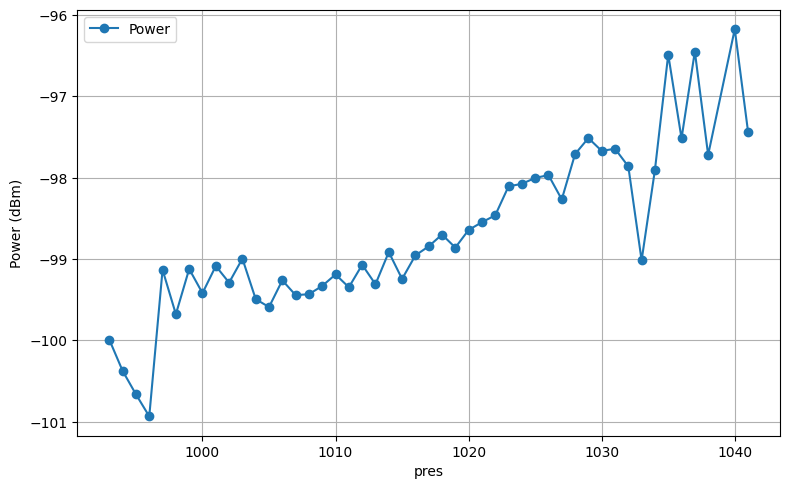

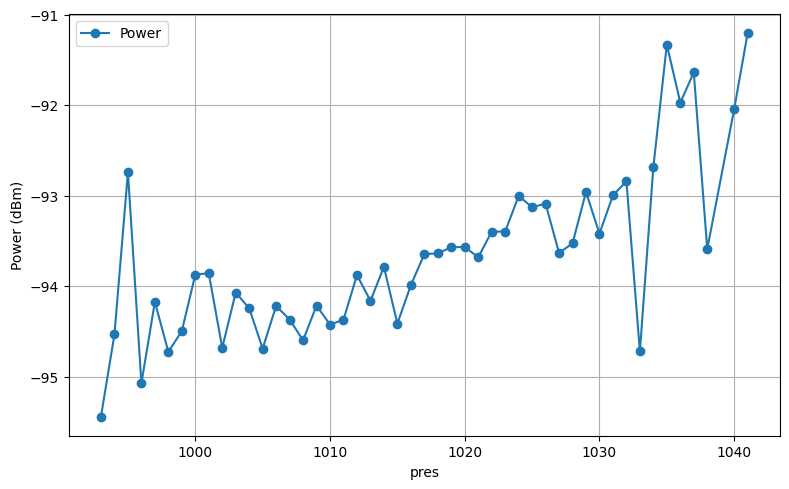

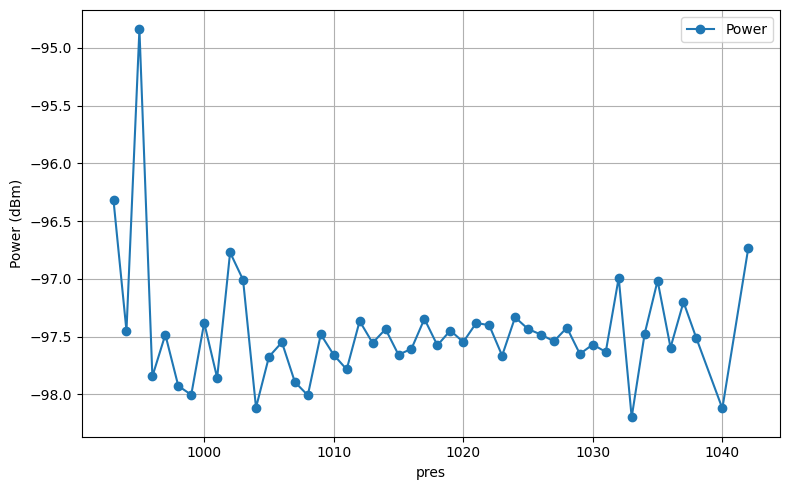

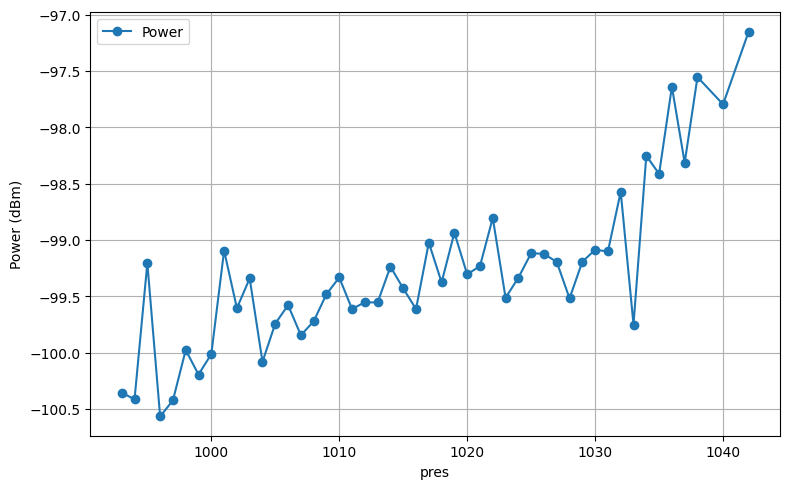

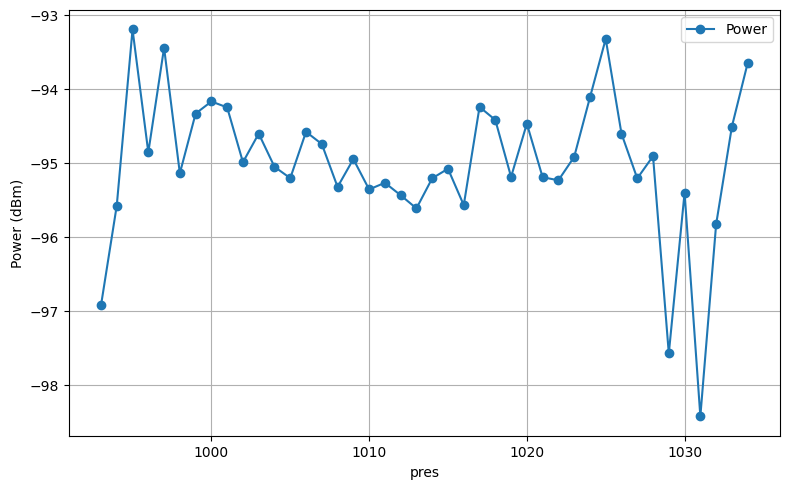

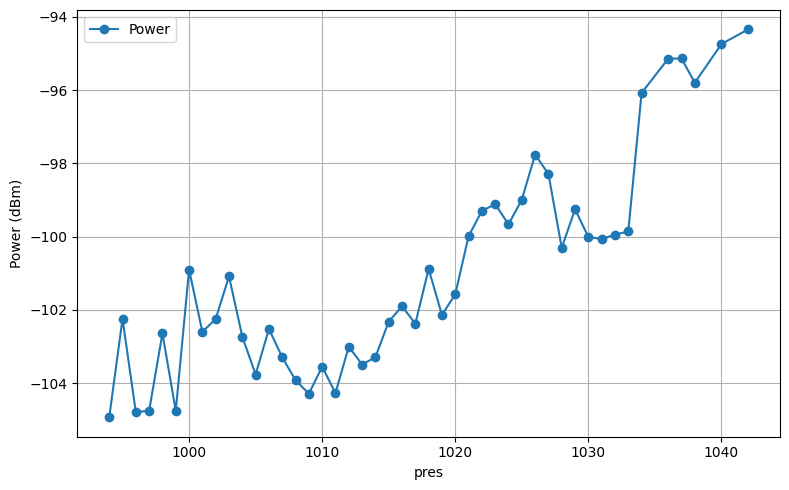

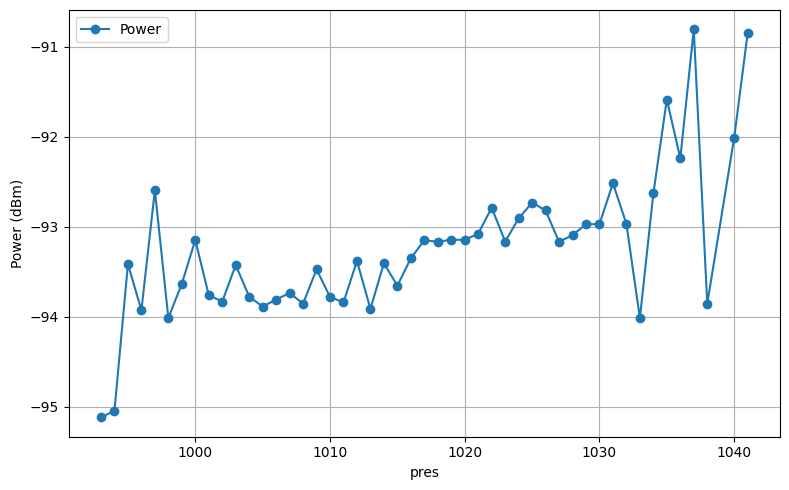

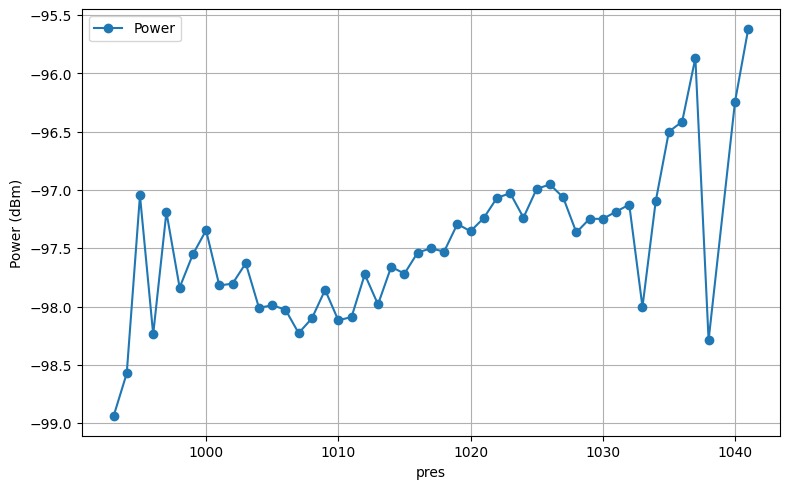

In [20]:
folders = ["data_0", "data_1", "data_2", "data_3", "data_4", "data_5", "data_6", "data_7"] # "data_0", "data_1", "data_2", "data_3", "data_4", "data_5", "data_6", "data_7"
for folder in folders:
    df = pd.read_csv(f"compressed_data/compressed_{folder}.csv")
    # df = df.drop(['snow', 'wpgt'], axis=1)

    feat = "pres" # temp, rhum, prcp, pres, dwpt, wdir, wspd, coco

    # print(len(df))
    df1 = df.dropna()
    # print(len(df1))
    df1 = df1.sort_values(by=feat)
    # print("Min Feat Value:", df[feat].min(), "Max Feat Value:", df[feat].max())
    if feat in ['temp', 'pres', 'dwpt', 'rhum']:
        df1[feat] = df[feat].round(0).astype(int)
    df1 = df1.groupby(feat, as_index=False)['power'].mean()
    # print(len(df1))
    print(folder)
    print(df1['power'].to_list())
    print(df1[feat].to_list())
    print('\n')

    plt.figure(figsize=(8, 5))
    plt.plot(df1[feat], df1["power"], marker='o',  linestyle='-', label='Power')
    plt.xlabel(feat)
    plt.ylabel('Power (dBm)')
    # plt.title(folder)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    # plt.show()

In [16]:
df1

,pres,power
0,993,-99.991587
1,994,-100.375190
2,995,-100.662693
3,996,-100.933624
4,997,-99.131553
5,998,-99.677997
6,999,-99.122145
7,1000,-99.418654
8,1001,-99.085619
9,1002,-99.289884


In [17]:
df1.to_csv("pres_pow.csv", index=False)

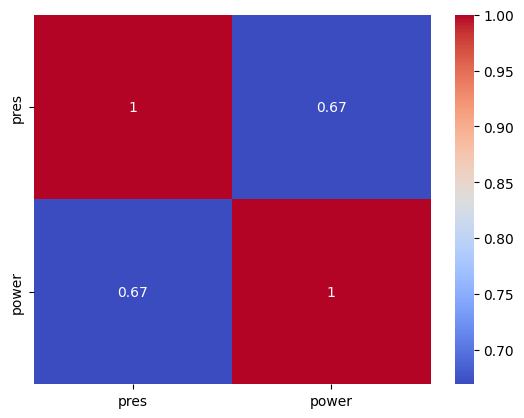

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_main = df.drop(["Date"], axis=1)
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()